In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.set_cmap('coolwarm')

<Figure size 432x288 with 0 Axes>

In [44]:
def SoftMax(z):
    return np.exp(z) / np.sum(np.exp(z), axis = 1, keepdims=True)
    
    
    

In [5]:
y = np.array([2, 6, 4, 9, 1])

print(SoftMax(y))

print(np.sum(SoftMax(y)))

[8.62077702e-04 4.70678477e-02 6.36994050e-03 9.45382993e-01
 3.17140663e-04]
1.0


In [ ]:
## the probability of each classes will always sum to be 1 so print(np.sum(SoftMax(y))) gives 1

In [41]:
class MultipleLogisticRegression:
    def __init__(self, shape_in, shape_out):
        self.weights = np.random.rand(shape_in, shape_out)
        self.bias    = np.random.randn(1, shape_out)
        
        
    def Fit(self, x, y, learn_rate = 1, iterations = 1000 ):    
        losses = []
        for i in range(iterations):
            #y_hat = x @ weights + bias
            #p_hat = Sigmoid(y_hat)
            p_hat = self.Predict(x)

            loss  = -np.sum(y* np.log(p_hat + 1e-99))
            losses.append(loss)


            self.weights -= learn_rate* x.T @ (p_hat - y)  #p_hat = sigmoid(y) and @ is matrix multiply
            self.bias    -= learn_rate* np.sum(p_hat - y, axis = 0)

        plt.plot(losses)    
    
    def Predict(self, x):
        y_hat = x @ self.weights + self.bias
        p_hat = SoftMax(y_hat)
        return p_hat
        

##  Run model

In [90]:
n = 1000
d = 2
k = 3

x_0 = np.random.randn(n, d) + ( 1, 7)
x_1 = np.random.randn(n, d) + (-2, -2)
x_2 = np.random.randn(n, d) + (8, 2 )


x = np.vstack([x_0, x_1, x_2])

y_0 = np.zeros((n,1))
y_1 = np.ones((n,1))
y_2 = np.ones((n,1))*2

y = np.hstack([y_0, y_1, y_2])
y_list=[]
for i in range(k):
    y_list.append(y==i)

y=np.vstack(y_list)    
    

#plt.scatter(x[:,0], x[:,1], c=y)

#plt.scatter(x[:,0], x[:,1], c=y.flatten())



In [92]:
x

array([[0.60630659, 8.57709719],
       [1.57209459, 6.23862518],
       [3.05925667, 7.52646344],
       ...,
       [6.79451586, 1.31406137],
       [8.15375138, 2.72147012],
       [7.86841217, 2.73650371]])

In [91]:
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [32]:
SoftMax(y)

array([[1.23353201e-07],
       [1.23353201e-07],
       [1.23353201e-07],
       ...,
       [9.99541338e-04],
       [9.99541338e-04],
       [9.99541338e-04]])

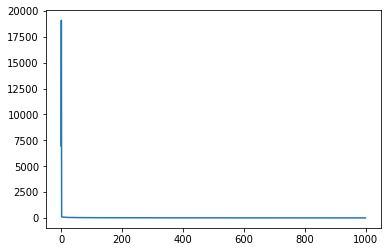

In [97]:
model = MultipleLogisticRegression(d,k)
model.Fit(x, y, learn_rate = 1e-3)

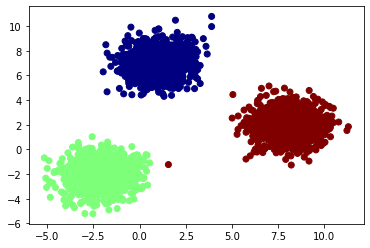

In [98]:
p_hat = model.Predict(x)
p_hat
plt.show()
plt.scatter(x[:,0], x[:,1], c=np.argmax(p_hat, axis = 1), cmap = 'jet')

In [95]:
p_hat

array([[9.99818935e-01, 5.16137417e-12, 1.81065055e-04],
       [9.93670296e-01, 9.94732997e-10, 6.32970263e-03],
       [9.91342530e-01, 3.70079052e-12, 8.65747015e-03],
       ...,
       [2.38476721e-03, 2.23836275e-09, 9.97615231e-01],
       [2.28025522e-03, 6.76960138e-12, 9.97719745e-01],
       [3.19296495e-03, 1.32928937e-11, 9.96807035e-01]])

## Example X and Y to work with


In [71]:
n =1000
cats = 3
dims = 2

x = []
y = []

for i in range(cats):
    x.append(np.random.randn(n, dims) + np.random.randn(dims)*5)
    y.append(np.array([np.arange(cats)] * n) ==i)

x = np.vstack(x)   
y = np.vstack(y)   
    

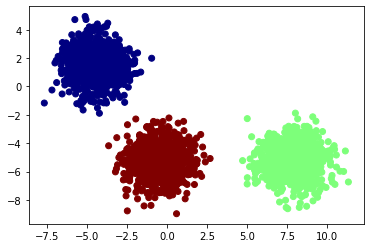

In [60]:
plt.scatter(x[:,0], x[:,1], c=np.argmax(y, axis =1), cmap ='jet' )
